## Exploratory data analysis (EDA)
Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. And there are four types EDA, these are univariate non-graphical, multivariate non- graphical, univariate graphical, and multivariate graphical.

In [9]:
# importing libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime, time

#### Importing scripts

In [10]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

#### Custom library

In [11]:
from PlottingFunctions import PlottingFunctions
from VisualisationPlots import VisualiseDf
from DistributionPlots import  DistributionPlots
from data_info import  DataInfo
#sns.set()

In [12]:
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/.gitignore
../data/ABtwoCampaignEngView.csv
../data/AdSmartABdata.csv.dvc
../data/browser_encoded.jpg
../data/clean_AdSmartABdata.csv.dvc
../data/platformEncV1.jpg
../data/push_v1.jpg


#### Loading data

In [13]:
# parser function to try parse the tweets from the weird format they're in. doesn't work though

# def parser(x): 
#     try:                                                                                                        
#         return datetime.strptime(x, '%Y-%m-%d')
#     except ValueError:
#         return np.nan

# df_ads = pd.read_csv("../data/ABtwoCampaignEngView.csv", parse_dates=[3], infer_datetime_format=True, date_parser=parser)

In [14]:
df_ads = pd.read_csv("../data/ABtwoCampaignEngView.csv")

In [15]:
df_ads.head(2)

,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,1333639,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0,0
1,730667,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0,0


### Explore The Data

In [17]:
# info
df_info = DataInfo(df_ads)

In [18]:
df_info.shape_df()

Dataframe contains 912712 rows and 10 columns


In [19]:
df_info.detail_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912712 entries, 0 to 912711
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   912712 non-null  int64 
 1   auction_id   912712 non-null  object
 2   experiment   912712 non-null  object
 3   date         912712 non-null  object
 4   hour         912712 non-null  int64 
 5   device_make  912712 non-null  object
 6   platform_os  912712 non-null  int64 
 7   browser      912712 non-null  int64 
 8   yes          912712 non-null  int64 
 9   no           912712 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 69.6+ MB
None


In [20]:
# copying dataframe and work on the copy 'df_copy'
dfCopy= df_ads.copy(deep=True)

In [21]:
# getting the count of the experiment groups before removing unresponsive users

before_countdf = dfCopy.groupby('experiment').agg({'yes':['sum','count']}).reset_index().yes
before_countdf

,sum,count
0,10641,456356
1,82132,456356


The number of users in both the control and the exposed experiment groups are exactly the same, 456356.

In [22]:
# getting users who only select yes or no, since working on unresponive users won't be relevant
dfCopy = dfCopy[dfCopy['yes'] == 1].append(dfCopy[dfCopy['no'] == 1])
dfCopy.head(5)

C:\Users\gwang\AppData\Local\Temp\ipykernel_15472\2599583195.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfCopy = dfCopy[dfCopy['yes'] == 1].append(dfCopy[dfCopy['no'] == 1])


,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,2201667,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1,0
84,917467,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1,0
103,809779,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1,0
209,365586,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1,0
255,1215695,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1,0


In [23]:
dfCopy.shape

(110570, 10)

In [24]:
# show the control group
control_df = dfCopy[dfCopy['experiment'] == 'control']
control_df.head(5)

,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,2201667,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1,0
84,917467,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1,0
103,809779,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1,0
209,365586,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1,0
255,1215695,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1,0


In [25]:
control_df.shape

(18899, 10)

In [26]:
# show the exposed group
exposed_df = dfCopy[dfCopy['experiment'] == 'exposed']
exposed_df.head(5)

,Unnamed: 0,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
456356,189750,143da30d-ebde-467f-8d66-acc80a4ff898,exposed,<built-in method date of Timestamp object at 0...,19,Samsung,101,15,1,0
456358,376033,28304800-7650-4dae-84be-17e5b5c04868,exposed,<built-in method date of Timestamp object at 0...,4,Samsung,101,6,1,0
456364,2306172,f6d8f3f7-75b6-45a2-a277-793f3b387398,exposed,<built-in method date of Timestamp object at 0...,8,Apple,101,7,1,0
456365,2065831,dd0355b7-b1cd-4c87-bf70-2c2093dd61b2,exposed,<built-in method date of Timestamp object at 0...,0,Apple,163,7,1,0
456368,1412112,9728e114-5e94-4fb9-a193-44766e2abc55,exposed,<built-in method date of Timestamp object at 0...,14,Samsung,162,6,1,0


In [27]:
exposed_df.shape

(91671, 10)

## Only 110,570 auctions were responsive, out of which 18,899 are from the control group, and 91,671 form the exposed group.

## Dropping the column 'Unnamed: 0' from the control and exposed groups

In [34]:
# dropping the column 'Unnamed: 0' from the exposed group

new_exposed_df = exposed_df[['auction_id', 'experiment', 'date', 'hour', 'device_make', 'platform_os', 'browser', 'yes', 'no']]
new_exposed_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
456356,143da30d-ebde-467f-8d66-acc80a4ff898,exposed,<built-in method date of Timestamp object at 0...,19,Samsung,101,15,1,0
456358,28304800-7650-4dae-84be-17e5b5c04868,exposed,<built-in method date of Timestamp object at 0...,4,Samsung,101,6,1,0
456364,f6d8f3f7-75b6-45a2-a277-793f3b387398,exposed,<built-in method date of Timestamp object at 0...,8,Apple,101,7,1,0
456365,dd0355b7-b1cd-4c87-bf70-2c2093dd61b2,exposed,<built-in method date of Timestamp object at 0...,0,Apple,163,7,1,0
456368,9728e114-5e94-4fb9-a193-44766e2abc55,exposed,<built-in method date of Timestamp object at 0...,14,Samsung,162,6,1,0


In [35]:
new_exposed_df.shape

(91671, 9)

In [36]:
# dropping the column 'Unnamed: 0' from the control group

new_control_df = control_df[['auction_id', 'experiment', 'date', 'hour', 'device_make', 'platform_os', 'browser', 'yes', 'no']]
new_control_df.head(3)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1,0
84,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1,0
103,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1,0


In [37]:
new_control_df.shape

(18899, 9)

The number of rows matches the ones gotten from above.

## Removing the 'date' column
All values in the 'date' column are of a similar unique type to this: <built-in method date of Timestamp object at 0x7fc338c32de0>.
<br>
As a result, we will remove them from our dataset in order to get a better understanding of the dataset holistically.

In [38]:
# for the exposed group

newnew_exposed_df = new_exposed_df[['auction_id', 'experiment', 'hour', 'device_make', 'platform_os', 'browser', 'yes', 'no']]
newnew_exposed_df.head(2)

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
456356,143da30d-ebde-467f-8d66-acc80a4ff898,exposed,19,Samsung,101,15,1,0
456358,28304800-7650-4dae-84be-17e5b5c04868,exposed,4,Samsung,101,6,1,0


In [39]:
newnew_exposed_df.shape

(91671, 8)

In [40]:
# for the control group

newnew_control_df = new_control_df[['auction_id', 'experiment', 'hour', 'device_make', 'platform_os', 'browser', 'yes', 'no']]
newnew_control_df.head(2)

,auction_id,experiment,hour,device_make,platform_os,browser,yes,no
80,eb941471-f485-4516-b4d3-648e7838d53a,control,15,Apple,101,15,1,0
84,622af8e2-7bcf-4681-a921-442e1f8378f1,control,6,Apple,101,5,1,0


In [41]:
newnew_control_df.shape

(18899, 8)

## Plotting 

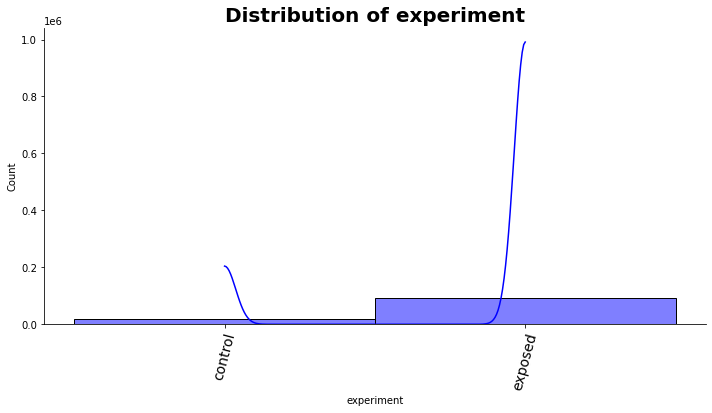

In [28]:
# histogram of experiment groups
fig = VisualiseDf.plot_hist(dfCopy,'experiment','blue')

This shows that there were more people exposed to the experiment in this dataset.

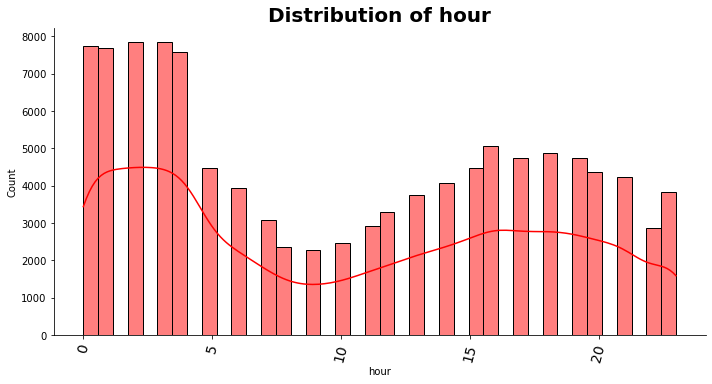

In [43]:
# histogram of hour
fig = VisualiseDf.plot_hist(dfCopy,'hour','red')

Most responses were recorded either really late at tnight or in the late afternoon.

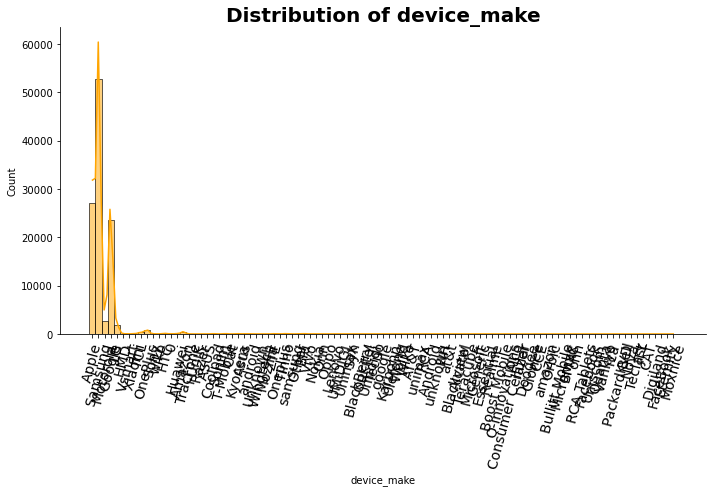

In [45]:
# histogram of device_make
fig = VisualiseDf.plot_hist(dfCopy,'device_make','orange')

Most users had samsung phones, with the second most frequent device_make being apple. 

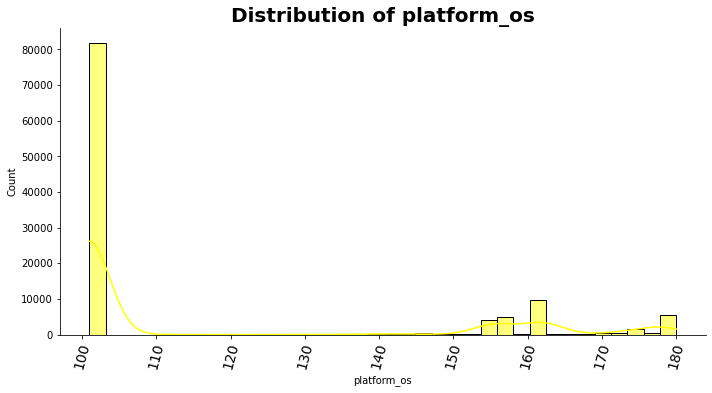

In [47]:
# histogram of platform_os
fig = VisualiseDf.plot_hist(dfCopy,'platform_os','yellow')

Most users used recorded answers on devices using plaform 100.

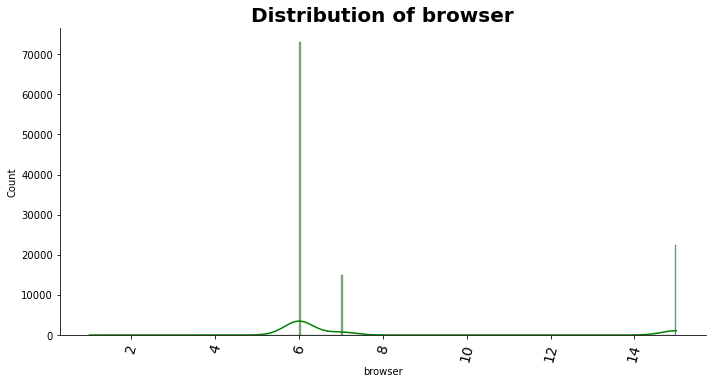

In [48]:
# histogram of browser
fig = VisualiseDf.plot_hist(dfCopy,'browser','green')

Browser 6 looks like it has a browser monopoly among the people who recordeed answers.

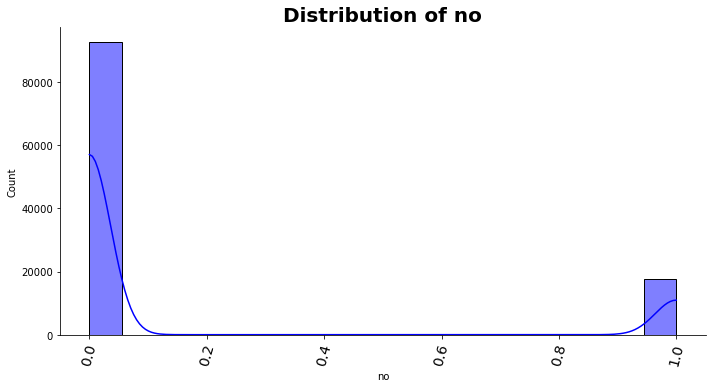

In [50]:
# histogram of yes
fig = VisualiseDf.plot_hist(dfCopy,'no','blue')

In [51]:
# grouping data by browser and showing aggregates of 10 hours
data_byDate = dfCopy.groupby(['browser']).agg({'hour': ['count']})
data_byDate.columns = ['count']
data_byDate = data_byDate.sort_values(by='count', ascending=False)
data_byDate = data_byDate.reset_index()
data_byDate.head(10)

,browser,count
0,6,72954
1,15,22489
2,7,14979
3,5,86
4,12,38
5,1,14
6,8,10


In [ ]:
# fig = VisualiseDf.plot_hist(dfCopy,'date','brown')

## Most responses seem to have been recorded at night, in between the hours of 12am-3am.

In [52]:
# group by hour and aggreagte all columns 
date_Agg = dfCopy.groupby('hour').agg({'experiment':'count','hour':'sum','yes':'sum', 'no':'sum'})
date_Agg

,experiment,hour,yes,no
hour,,,,
0,7746,0,6620,1126
1,7681,7681,6599,1082
2,7840,15680,6600,1240
3,7837,23511,6652,1185
4,7591,30364,6512,1079
5,4471,22355,3825,646
6,3949,23694,3332,617
7,3086,21602,2564,522
8,2369,18952,1951,418


## * this shows overall statuses in a day


In [54]:
# removing yes and no columns and replace it with response column. For both groups if response=1, it means yes 
#and if it is 0, it means no
##for control group
df1 = newnew_control_df[newnew_control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = newnew_control_df[newnew_control_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
control_plot_df = df1.append(df2).reset_index(drop=True)
control_plot_df.head(5)

C:\Users\gwang\AppData\Local\Temp\ipykernel_15472\2758419438.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  control_plot_df = df1.append(df2).reset_index(drop=True)


,auction_id,experiment,hour,device_make,platform_os,browser,response
0,eb941471-f485-4516-b4d3-648e7838d53a,control,15,Apple,101,15,1
1,622af8e2-7bcf-4681-a921-442e1f8378f1,control,6,Apple,101,5,1
2,56a03982-6278-4083-9554-3a069dbc22c8,control,20,Samsung,162,6,1
3,2711e2f3-a624-4243-800e-693a888bc394,control,3,Samsung,162,6,1
4,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,15,Apple,101,7,1


In [55]:
#do the same for exposed groups
df1 = newnew_exposed_df[newnew_exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = newnew_exposed_df[newnew_exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
exposed_plot_df = df1.append(df2).reset_index(drop=True)
exposed_plot_df.head(5)

C:\Users\gwang\AppData\Local\Temp\ipykernel_15472\627024297.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exposed_plot_df = df1.append(df2).reset_index(drop=True)


,auction_id,experiment,hour,device_make,platform_os,browser,response
0,143da30d-ebde-467f-8d66-acc80a4ff898,exposed,19,Samsung,101,15,1
1,28304800-7650-4dae-84be-17e5b5c04868,exposed,4,Samsung,101,6,1
2,f6d8f3f7-75b6-45a2-a277-793f3b387398,exposed,8,Apple,101,7,1
3,dd0355b7-b1cd-4c87-bf70-2c2093dd61b2,exposed,0,Apple,163,7,1
4,9728e114-5e94-4fb9-a193-44766e2abc55,exposed,14,Samsung,162,6,1


In [56]:
# count yes and no for control
control_yes = control_plot_df.groupby(['response']).agg({'response': ['count']})
control_yes.columns = ['count']
control_yes = control_yes.reset_index()
control_yes

,response,count
0,0,8258
1,1,10641


In [57]:
#Do the same for exposed
exposed_yes = exposed_plot_df.groupby(['response']).agg({'response': ['count']})
exposed_yes.columns = ['count']
exposed_yes = exposed_yes.reset_index()
exposed_yes

,response,count
0,0,9539
1,1,82132


## The exposed group said 'yes' more times than that of the control group 

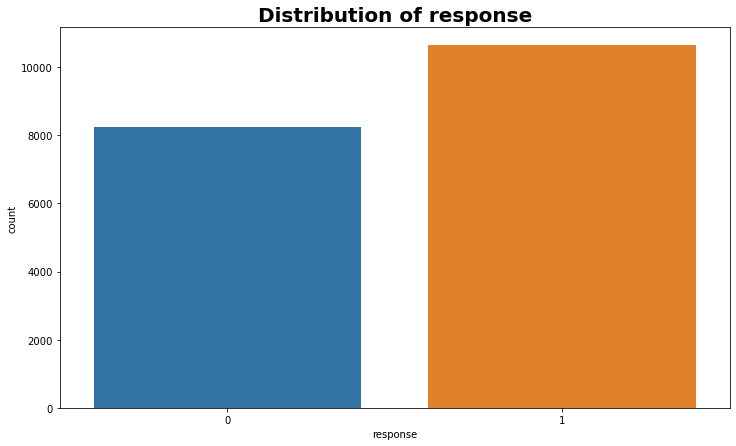

In [58]:
VisualiseDf.plot_count(control_plot_df, 'response')

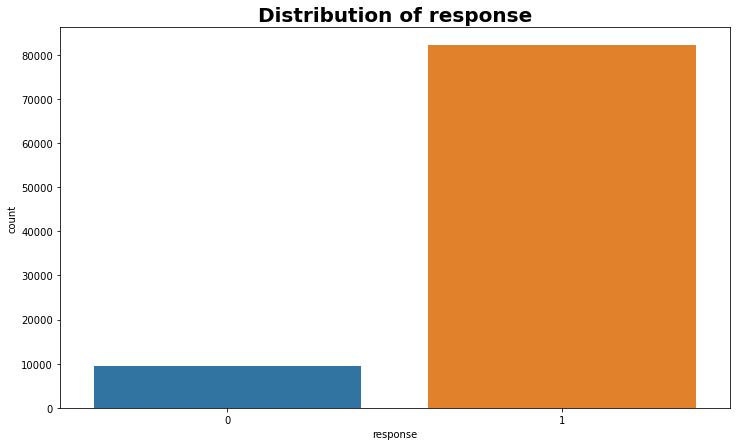

In [59]:
VisualiseDf.plot_count(exposed_plot_df, 'response')

In [60]:
control_plot_df.to_csv('../data/control_df_two.csv', index=False)
print("New Control Data Saved ! ")

exposed_plot_df.to_csv('../data/exposed_df_two.csv', index=False)
print("New Exposed Data Saved ! ")

New Control Data Saved ! 
New Exposed Data Saved ! 
